# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 2 Naive Bayes Classifier ##


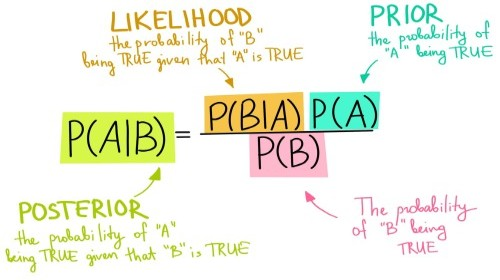

## Before We Begin ##

Run the code in the following code cells to "mount" the Google Drive directory.

### Mount Google Drive
Download and save a copy of the Lab2 Notebook and Datasets (*train_dataset.npy*, *train_labels.npy*, *test_dataset.npy*, *test_labels.npy*) to your Google Drive, ensuring that all these files are in the same location.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Modify the pathway of the *%cd* shell command according to the location in your Google Drive where you have saved the Notebook and datasets. Double-check the output of the *%ls* shell command to ensure that you are in the correct working directory. It should display the filenames of *lab2_task.ipynb*, *train_dataset.npy*, *train_labels.npy*, *test_dataset.npy*, *test_labels.npy*.

In [2]:
%cd "/content/drive/MyDrive/lab2"
%ls

[Errno 2] No such file or directory: '/content/drive/MyDrive/lab2'
/content
drive/  sample_data/


If you already mount the Google Drive in your section, please do not rerun the above codes. 

## Dataset Description
This lab tackles the **Sentiment Analysis** task and uses the **Twitter US Airline Sentiment** data as in PA1. For the sentiment analysis task and the sentiment data, please refer to PA1's introductions. 

(Note that you can still finish the following lab tasks even if you do not know the sentiment analysis task or the meanings of the data. You can simply treat it as a classification task with some given data. But getting familiar with the data representations will help you to understand the practical application of the Naive Bayes classifier as well as what your algorithm is actually doing.)

Here we give a brief description of the datasets.

- *train_dataset.npy* is a Numpy 2D array with shape $(900, 2642)$, where $900$ is the number of training data samples, and $2642$ is the number of features. The elements in the array are in Boolean data type, i.e., each element $x_{ik}$ in the array is *True* or *False*. $x_{ik}=True$ means $feature_k = yes$ for data sample $i$. $x_{ik}=False$ means $feature_k = no$ for data sample $i$.

- *test_dataset.npy* is a Numpy 2D array with shape $(100, 2642)$, where $100$ is the number of test data samples, and $2642$ is the number of features. The elements in the array are in Boolean data type, i.e., each element $x_{ik}$ in the array is *True* or *False*. $x_{ik}=True$ means $feature_k = yes$ for data sample $i$. $x_{ik}=False$ means $feature_k = no$ for data sample $i$.

- *train_labels.npy* is a Numpy 1D array with shape $(900, )$. The array represents the class labels for the training data samples, i.e., each element is an integer from $\{0,1,2\}$, representing the index of the sentiment class (positive, neutral, or negative).

- *test_labels.npy* is a Numpy 1D array with shape $(100, )$. The array represents the class labels for the text data samples, i.e., each element is an integer from $\{0,1,2\}$, representing the index of the sentiment class (positive, neutral, or negative).


### Load Datasets
Load the train and test datasets from Google Drive into NumPy using *np.load()*.

In [ ]:
import numpy as np
train_dataset = np.load("train_dataset.npy")
test_dataset = np.load("test_dataset.npy")
train_labels = np.load("train_labels.npy")
test_labels = np.load("test_labels.npy")

**Note**: you may find that the above datasets are different from the datasets we used in PA1. Although they are both from the same original data and have the same number of features, their processing methods are different. In PA1, *train_dataset* and *test_dataset* are float arrays, where each feature represents one word, and the feature values are related to the word frequency. While in this lab, *train_dataset* and *test_dataset* are boolean arrays, representing whether the feature (i.e., the word) occurs in the data sample (i.e., text) or not.

## Naive Bayes Classifier
First of all, if we want to get 
$P(label|features)$, then we may need to find

$P(label|features)=\frac{P(label)P(f_1|label)P(f_2|label)P(f_3|label)\ldots P(f_m|label)}{\sum_{j=1}^n P(f_1|label_j)P(f_2|label_j)P(f_3|label_j)\ldots P(f_m|label_j)P(label_j)}$

Thus, the classifier needs to estimate: 
1. the prior probabilities of class labels, i.e. $P(label)$. 
2. the likelihoods for all features i.e. $P(feature|label)$.

Since our goal is only Classification, we __don't__ need to worry about the denominator (Marginal Probability), as the denominator is the same for all features regarding labels and can be ignored during comparison or sorting.

We don't expect you to have Object-Oriented Programming background, so we have implemented the class-related functions for you. 

These are the class attributes of *NaiveBayesClassifer*. They can be accessed within all of the functions defined inside *NaiveBayesClassifer*: \
*self.train_dataset*: The training dataset with shape (*train_size*, *num_features*). \
*self.train_labels*: The class labels of the training dataset with shape (*train_size*, ). \
*self.train_size*: The number of data samples in the training dataset. \
*self.num_features*: The number of features. \
*self.num_classes*: The number of classes. \

### Task 1: Fit Training Data
Implement the function *fit(self, train_dataset, train_labels)*. Assign the values for *self.train_size*, *self.num_features*, *self.num_classes* after fitting the *train_dataset* and *train_labels*.

Hint 1: *train_dataset* has shape *(train_size, num_features)*.

Hint 2: *num_classes* is the maximum number in *train_labels* + 1 since the class index starts from $0$.

Hint 3: You may use Numpy's *amax()* function.

https://numpy.org/doc/stable/reference/generated/numpy.amax.html

### Task 2: Estimate Class Priors
Implement the function *estimate_class_prior(self)*.

<mark>Return a Numpy 1D array with shape *(self.num_classes, )*</mark>, containing the prior probabilities of all classes. Note that we adopt the add-one-count trick as mentioned in the lab2 review.

$P(label_j)=\frac{\text{count_samples}(label=j)+1}{\text{train_size}+\text{num_classes}}$.

Hint 1: You may use Numpy's *sum()* function.

Hint 2: Specify the correct values for the parameter *axis* and keep care for Numpy broadcasting.

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

### Task 3: Estimate Likelihoods
Implement the function *estimate_likelihoods(self)*.

<mark>Return a Numpy 2D array with shape *(self.num_features, self.num_classes)*</mark>, containing the likelihoods of all features given each class. Since the features have boolean values, this function actually returns the "yes likelihoods". That means, in the returned Numpy 2D array $L$,

$L_{ij}=L[i, j]=Probability(feature_i=yes|label=j)$.

Then for the "no likelihoods", we can simply get them by 

$\text{no likelihood}=1-\text{yes likelihood}$. 

For example, 

$Probability(feature_i=no|label=j)=1-Probability(feature_i=yes|label=j)=1-L_{ij}$.

Note that we adopt the add-one-count trick as mentioned in the lab2 review.

$P(feature_i|c_j)=\frac{\text{count_samples}(feature_i=yes \& label=j)+1}{\text{count_samples}(label=j)+2}$.

Hint 1: You may use Numpy's *transpose(), dot(), sum()* functions.

Hint 2: Specify the correct values for the parameter *axis* and keep care for Numpy broadcasting.

https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

https://numpy.org/doc/stable/reference/generated/numpy.dot.html

https://numpy.org/doc/stable/reference/generated/numpy.sum.html

### Task 4: Predict Label for Test Data
Implement the function *predict(self, test_dataset)*. For the sake of simplicity, you can assume that ties will never occur.

<mark>Return the predicted labels (integer value from $0$ to *self.num_classes*$-1$) of *test_dataset* as a Numpy 1D array with shape *(test_size, )*</mark>.

Hint 1: *test_dataset* has shape *(test_size, num_features)*.

Hint 2: Recall that we select the class label with the highest posterior probability to classify a testing data sample:

$P(label|features)=\frac{P(label)P(f_1|label)P(f_2|label)P(f_3|label)\ldots P(f_m|label)}{\sum_{j=1}^n P(f_1|label_j)P(f_2|label_j)P(f_3|label_j)\ldots P(f_m|label_j)P(label_j)}$.

In practical implementation, it is not necessary to compute the posterior probabilities of all classes for all testing data samples. For a specific testing sample, the denominator is the same for all labels, so we only need to compare the numerators $P(label)P(f_1|label)P(f_2|label)P(f_3|label)\ldots P(f_m|label)$, which can be further simplified by comparing the *log* of the numerators: $\log(P(label)P(f_1|label)P(f_2|label)P(f_3|label)\ldots P(f_m|label))=\log(P(label))+\log(P(f_1|label))+\log(P(f_2|label))+\log(P(f_3|label)) \cdots\log(P(f_m|label))$.

Hint 3: Recall the relationships between *yes_likelihoods* and *no_likelihoods* illustrated in the previous task.

Hint 4: You may use Numpy's *log(), dot(), argmax()* functions.

https://numpy.org/doc/stable/reference/generated/numpy.log.html

https://numpy.org/doc/stable/reference/generated/numpy.dot.html

https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

### Tasks 1 - 4 Code Cell:

In [ ]:
class NaiveBayesClassifier:
  def __init__(self):
    self.train_dataset = None
    self.train_labels = None
    self.train_size = 0
    self.num_features = 0
    self.num_classes = 0

  def fit(self, train_dataset, train_labels):
    self.train_dataset = train_dataset
    self.train_labels = train_labels
    # TODO
    self.train_size = 
    self.num_features = 
    self.num_classes = 
  
  def estimate_class_prior(self):
    # TODO
    # return class_prior

  def estimate_likelihoods(self):
    # TODO
    # return likelihoods

  def predict(self, test_dataset):
    class_prior = self.estimate_class_prior()
    yes_likelihoods = self.estimate_likelihoods()
    no_likelihoods = 1 - yes_likelihoods
    # TODO
    # return test_predict

## Test Run
You can use all the previously defined functions in Tasks 1 - 4 to perform the Naive Bayes classifier on the given datasets. We provide some results for you to self-test your functions. Feel free to modify this code cell for your own testing and debugging purposes, which will not be graded.

In [ ]:
import numpy as np
if __name__ == '__main__':
  train_dataset = np.load("train_dataset.npy")
  test_dataset = np.load("test_dataset.npy")
  train_labels = np.load("train_labels.npy")
  test_labels = np.load("test_labels.npy")

  nb_model = NaiveBayesClassifier()
  nb_model.fit(train_dataset, train_labels)
  print(f"After fitting the training data, the train size is\
  {nb_model.train_size}, the number of features is {nb_model.num_features},\
  the number of class labels is {nb_model.num_classes}.") # should be 900, 2642, 3
  class_prior = nb_model.estimate_class_prior()
  print(f"The class priors are {class_prior}.") # should be [0.51495017 0.26135105 0.22369878]
  likelihoods = nb_model.estimate_likelihoods()
  print(f"The likelihoods of the first 5 features are \n {likelihoods[:5, :]}.") # should be [[0.00214592 0.00843882 0.00492611]
                                                                                 #            [0.00429185 0.00421941 0.00492611]
                                                                                 #            [0.00214592 0.00421941 0.00492611]
                                                                                 #            [0.00214592 0.00843882 0.00492611]
                                                                                 #            [0.00214592 0.00421941 0.00492611]]
  test_predict = nb_model.predict(test_dataset)
  print(f"The predictions for test data are:\n {test_predict}") # should be [0 0 1 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0 1 2 0 0 0 0 0 0
                                                                #            0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 2 1 0 0 0 1 0 0 0 0 0 1 0 0
                                                                #            0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 2 0 0 0 2 0 0 1 0]

After fitting the training data, the train size is  900, the number of features is 2642,  the number of class labels is 3.
The class priors are [0.51495017 0.26135105 0.22369878].
The likelihoods of the first 5 features are 
 [[0.00214592 0.00843882 0.00492611]
 [0.00429185 0.00421941 0.00492611]
 [0.00214592 0.00421941 0.00492611]
 [0.00214592 0.00843882 0.00492611]
 [0.00214592 0.00421941 0.00492611]].
The predictions for test data are:
 [0 0 1 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 1 1 0 0 0 0 2 0 0 0 1 2 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 2 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 2 0 0 0 2 0 0 1 0]


## Test Accuracy
Next, you can compare your predictions versus the actual target labels of *test_labels* and calculate the accuracy score of the Naive Bayes classifier.

In [ ]:
accuracy_score = np.sum(test_predict == test_labels) / test_labels.shape[0]

print(accuracy_score) # should be 0.62

0.62


As you can see above, the accuracy score is not very high. Why did the Naive Bayes classifier fail to model the problem? Does that mean the Naive Bayes classifier is not suitable for text data and the sentiment analysis task?

On the one hand, the text data are usually very sparse. You may have found that by observing *train_dataset*, where most elements are *False*. You may also have found that most "yes likelihoods" returned by *estimate_likelihoods()* are very small, which means the features (i.e., words) only occurs in few texts compared with a large amount of training texts. Thus, the text data are too sparse to fit the simple Naive Bayes assumption.

However, on the other hand, the Naive Bayes classifier can be powerful for the text data and for the text classification task if we make slight modifications to the assumptions and change it to a slightly more complicated Naive Bayes model. For example, if we assume the text data have multinomial distributions and combine the Naive Bayes model with a generative model, the corresponding Naive Bayes classifier would achieve high accuracy score and very good performance. Although this part of the contents is beyond this lab's scope, you are highly encouraged to read the reference paper [Semi-Supervised Text Classification Using EM](https://www.cs.cmu.edu/~tom/pubs/NigamEtAl-bookChapter.pdf) if you are interested in the topic.

# Unmount Google Drive

In [ ]:
drive.flush_and_unmount()